In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import timedelta,datetime
df=pd.read_csv('C:\\workplace\\electricity_demand\\dataset\\AEP_hourly.csv')
df.sort_values('Datetime',ascending=True,inplace=True)
df.columns=['date_time','aep_mw']

In [3]:
def preparion (df,num_lags,lag_feature):
    df_prpocessed=pd.DataFrame(index=df.index,columns=['date_time','cos_day_year','sin_day_year',
                                                       'cos_day_week','sin_day_week','cos_hour','sin_hour']+['lags_{}'.format(i) for i in range(num_lags)]+['target'])
    df_prpocessed['target']=df[lag_feature].shift(-1)
    for i in range(num_lags):
        df_prpocessed['lags_{}'.format(i)]=df[lag_feature].shift(i)

    df_prpocessed['date_time']=df['date_time']

    a=pd.Series(pd.to_datetime(df_prpocessed['date_time']))+timedelta(hours=1)
    df_prpocessed['cos_day_year']=pd.Series(np.cos(2*np.pi*a.dt.day_of_year/366),index=df_prpocessed.index)
    df_prpocessed['sin_day_year']=pd.Series(np.sin(2*np.pi*a.dt.day_of_year/366),index=df_prpocessed.index)
    df_prpocessed['cos_day_week']=pd.Series(np.cos(2*np.pi*a.dt.day/7),index=df_prpocessed.index)
    df_prpocessed['sin_day_week']=pd.Series(np.sin(2*np.pi*a.dt.day/7),index=df_prpocessed.index)
    df_prpocessed['cos_hour']=pd.Series(np.cos(2*np.pi*a.dt.hour/24),index=df_prpocessed.index)
    df_prpocessed['sin_hour']=pd.Series(np.sin(2*np.pi*a.dt.hour/24),index=df_prpocessed.index)
    
    df_prpocessed.dropna(inplace=True)
    df_prpocessed.index=df_prpocessed['date_time']
    df_prpocessed.drop('date_time',axis=1,inplace=True)
    return df_prpocessed

In [4]:
train_df=df[df['date_time']<='2017-08-02 23:00:00']
train_df=preparion(train_df,169,'aep_mw')
train_df

,cos_day_year,sin_day_year,cos_day_week,sin_day_week,cos_hour,sin_hour,lags_0,lags_1,lags_2,lags_3,...,lags_160,lags_161,lags_162,lags_163,lags_164,lags_165,lags_166,lags_167,lags_168,target
date_time,,,,,,,,,,,,,,,,,,,,,
2004-10-08 01:00:00,0.128398,-0.991723,0.623490,0.781831,8.660254e-01,0.500000,12468.0,13271.0,14359.0,15407.0,...,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0,12379.0,12046.0
2004-10-08 02:00:00,0.128398,-0.991723,0.623490,0.781831,7.071068e-01,0.707107,12046.0,12468.0,13271.0,14359.0,...,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0,11749.0
2004-10-08 03:00:00,0.128398,-0.991723,0.623490,0.781831,5.000000e-01,0.866025,11749.0,12046.0,12468.0,13271.0,...,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11784.0
2004-10-08 04:00:00,0.128398,-0.991723,0.623490,0.781831,2.588190e-01,0.965926,11784.0,11749.0,12046.0,12468.0,...,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11919.0
2004-10-08 05:00:00,0.128398,-0.991723,0.623490,0.781831,6.123234e-17,1.000000,11919.0,11784.0,11749.0,12046.0,...,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,12610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-02 18:00:00,-0.861702,-0.507415,-0.222521,0.974928,2.588190e-01,-0.965926,19585.0,19749.0,19921.0,19797.0,...,13267.0,13943.0,15126.0,16520.0,17738.0,18071.0,18750.0,19325.0,19673.0,19151.0
2017-08-02 19:00:00,-0.861702,-0.507415,-0.222521,0.974928,5.000000e-01,-0.866025,19151.0,19585.0,19749.0,19921.0,...,12806.0,13267.0,13943.0,15126.0,16520.0,17738.0,18071.0,18750.0,19325.0,18495.0
2017-08-02 20:00:00,-0.861702,-0.507415,-0.222521,0.974928,7.071068e-01,-0.707107,18495.0,19151.0,19585.0,19749.0,...,12518.0,12806.0,13267.0,13943.0,15126.0,16520.0,17738.0,18071.0,18750.0,17771.0


In [5]:
X_train=train_df.drop('target',axis=1)
y_train=train_df[['target']]

In [6]:
from sklearn.preprocessing import PowerTransformer
power_Tx=PowerTransformer().fit(X_train)
power_Ty=PowerTransformer().fit(y_train)
X_trainp=power_Tx.transform(X_train)
y_trainp=power_Ty.transform(y_train)

In [7]:
from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split
X_fit,X_val,y_fit,y_val=train_test_split(X_train,y_train,test_size=0.3)
# Bench model 
model=XGBRegressor(objective='reg:absoluteerror',tree_method='hist',n_estimators=10000,learning_rate=0.1,max_depth=5,eval_metric='mape',n_jobs=-1,early_stopping_rounds=50).fit(X_val,y_val,eval_set=[(X_val,y_val)])

[0]	validation_0-mape:0.06095
[1]	validation_0-mape:0.03408
[2]	validation_0-mape:0.02603
[3]	validation_0-mape:0.02358
[4]	validation_0-mape:0.02110
[5]	validation_0-mape:0.01997
[6]	validation_0-mape:0.01907
[7]	validation_0-mape:0.01852
[8]	validation_0-mape:0.01821
[9]	validation_0-mape:0.01758
[10]	validation_0-mape:0.01650
[11]	validation_0-mape:0.01628
[12]	validation_0-mape:0.01604
[13]	validation_0-mape:0.01578
[14]	validation_0-mape:0.01540
[15]	validation_0-mape:0.01501
[16]	validation_0-mape:0.01483
[17]	validation_0-mape:0.01471
[18]	validation_0-mape:0.01455
[19]	validation_0-mape:0.01433
[20]	validation_0-mape:0.01410
[21]	validation_0-mape:0.01385
[22]	validation_0-mape:0.01371
[23]	validation_0-mape:0.01348
[24]	validation_0-mape:0.01334
[25]	validation_0-mape:0.01327
[26]	validation_0-mape:0.01316
[27]	validation_0-mape:0.01306
[28]	validation_0-mape:0.01291
[29]	validation_0-mape:0.01280
[30]	validation_0-mape:0.01275
[31]	validation_0-mape:0.01265
[32]	validation_0-

In [29]:
test_df=preparion(df,169,'aep_mw')
test_df[test_df.index>train_df.index[-1]]
test_df=test_df[test_df.index>'2017-08-02 22:00:00']
test_df.head()

,cos_day_year,sin_day_year,cos_day_week,sin_day_week,cos_hour,sin_hour,lags_0,lags_1,lags_2,lags_3,...,lags_160,lags_161,lags_162,lags_163,lags_164,lags_165,lags_166,lags_167,lags_168,target
date_time,,,,,,,,,,,,,,,,,,,,,
2017-08-02 23:00:00,-0.852864,-0.522133,-0.900969,0.433884,1.000000,0.000000,16100.0,17220.0,17771.0,18495.0,...,13896.0,13113.0,12593.0,12518.0,12806.0,13267.0,13943.0,15126.0,16520.0,14812.0
2017-08-03 00:00:00,-0.852864,-0.522133,-0.900969,0.433884,0.965926,0.258819,14812.0,16100.0,17220.0,17771.0,...,14612.0,13896.0,13113.0,12593.0,12518.0,12806.0,13267.0,13943.0,15126.0,13682.0
2017-08-03 01:00:00,-0.852864,-0.522133,-0.900969,0.433884,0.866025,0.500000,13682.0,14812.0,16100.0,17220.0,...,15277.0,14612.0,13896.0,13113.0,12593.0,12518.0,12806.0,13267.0,13943.0,12841.0
2017-08-03 02:00:00,-0.852864,-0.522133,-0.900969,0.433884,0.707107,0.707107,12841.0,13682.0,14812.0,16100.0,...,16143.0,15277.0,14612.0,13896.0,13113.0,12593.0,12518.0,12806.0,13267.0,12443.0
2017-08-03 03:00:00,-0.852864,-0.522133,-0.900969,0.433884,0.500000,0.866025,12443.0,12841.0,13682.0,14812.0,...,17002.0,16143.0,15277.0,14612.0,13896.0,13113.0,12593.0,12518.0,12806.0,12213.0


In [30]:
X_test=test_df.drop('target',axis=1)
y_test=test_df['target']

In [35]:
model=XGBRegressor(tree_method='hist',n_estimators=1000,learning_rate=0.1,max_depth=5,eval_metric='mae',n_jobs=-1).fit(X_train,y_train,eval_set=[(X_test,y_test)])
pred=model.predict(X_test)

[0]	validation_0-mae:13463.96881
[1]	validation_0-mae:12115.59378
[2]	validation_0-mae:10902.40050
[3]	validation_0-mae:9810.35437
[4]	validation_0-mae:8827.93849
[5]	validation_0-mae:7942.78313
[6]	validation_0-mae:7146.42300
[7]	validation_0-mae:6429.80496
[8]	validation_0-mae:5786.15279
[9]	validation_0-mae:5205.46845
[10]	validation_0-mae:4683.04060
[11]	validation_0-mae:4213.26662
[12]	validation_0-mae:3791.08332
[13]	validation_0-mae:3410.46823
[14]	validation_0-mae:3067.70191
[15]	validation_0-mae:2759.48093
[16]	validation_0-mae:2482.86692
[17]	validation_0-mae:2233.34459
[18]	validation_0-mae:2009.23154
[19]	validation_0-mae:1806.84978
[20]	validation_0-mae:1625.12035
[21]	validation_0-mae:1461.00046
[22]	validation_0-mae:1313.58422
[23]	validation_0-mae:1181.34606
[24]	validation_0-mae:1062.03690
[25]	validation_0-mae:954.43060
[26]	validation_0-mae:857.95877
[27]	validation_0-mae:771.01635
[28]	validation_0-mae:692.71211
[29]	validation_0-mae:622.46308
[30]	validation_0-mae:

In [38]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred)

(0.007348814528045984, 109.27271809189875)

<Axes: xlabel='date_time'>

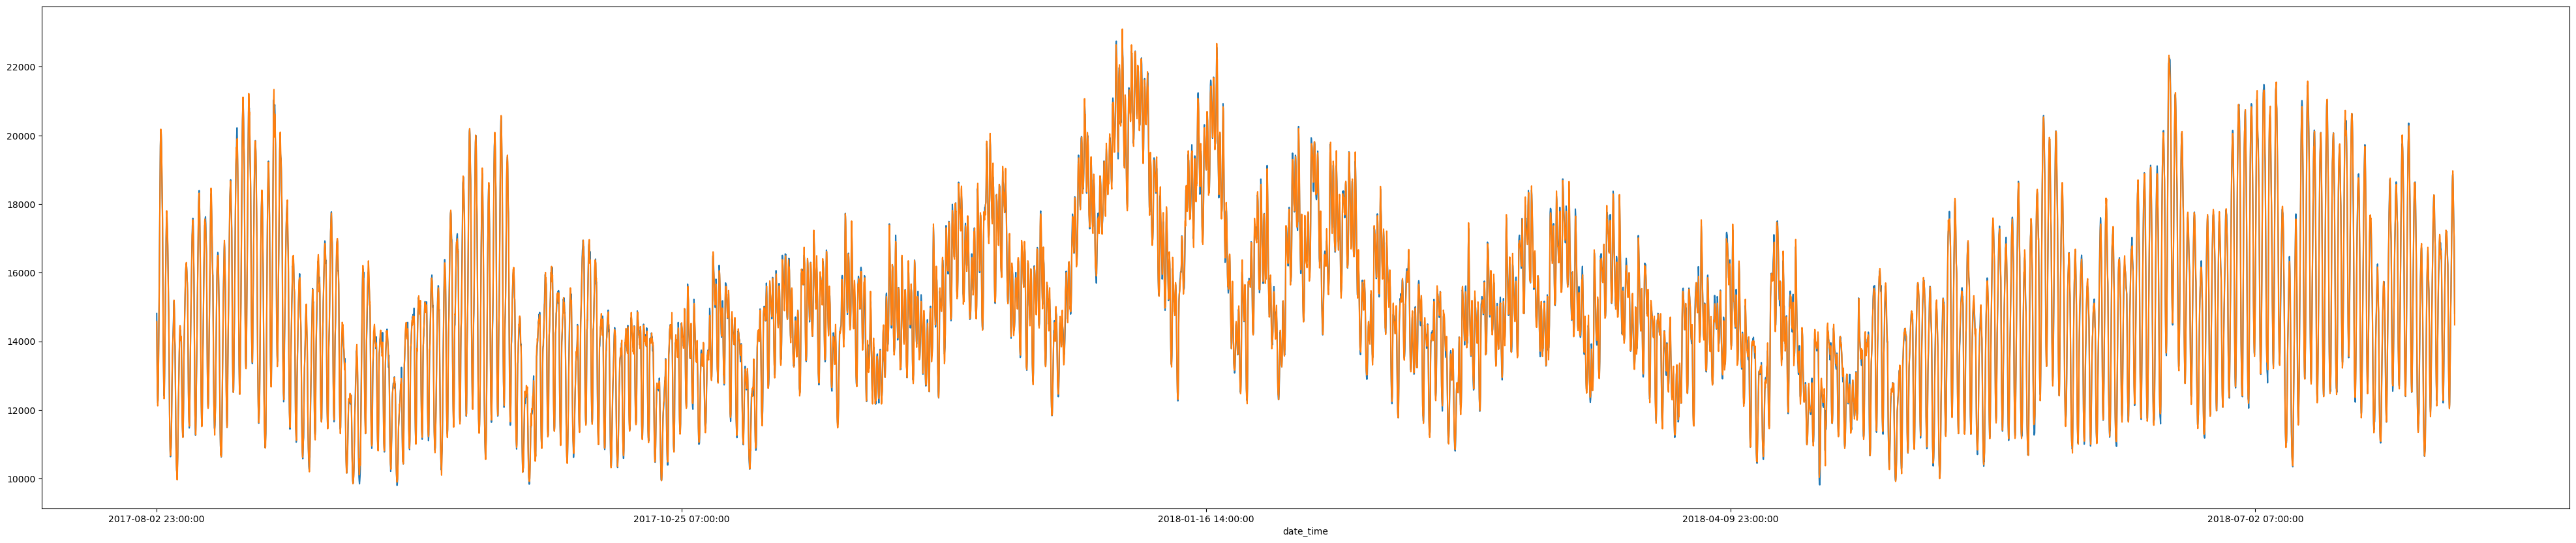

In [39]:
y_test.plot()
pd.Series(pred.reshape(-1)).plot(figsize=(50,10))

In [27]:
len(test_df)

121104

In [28]:
len(df)

121273